Data set imported successfully
Columns cleaned successfully!!
Index(['title', 'imdb_rating', 'year', 'certificates', 'genre', 'director',
       'star_cast', 'metascore', 'duration_(minutes)'],
      dtype='object')
Top 10 movies of IMDb rated:

                                                 title  imdb_rating  year
137                                      The Godfather          9.2  1972
106                                       12 Angry Men          9.0  1957
130                                    The Dark Knight          9.0  2008
132                                       Pulp Fiction          8.9  1994
15   The Lord of the Rings: The Fellowship of the Ring          8.9  2001
221                                          Inception          8.8  2010
14                                           Inception          8.8  2010
211                                         The Matrix          8.7  1999
24                                        Interstellar          8.7  2014
125           

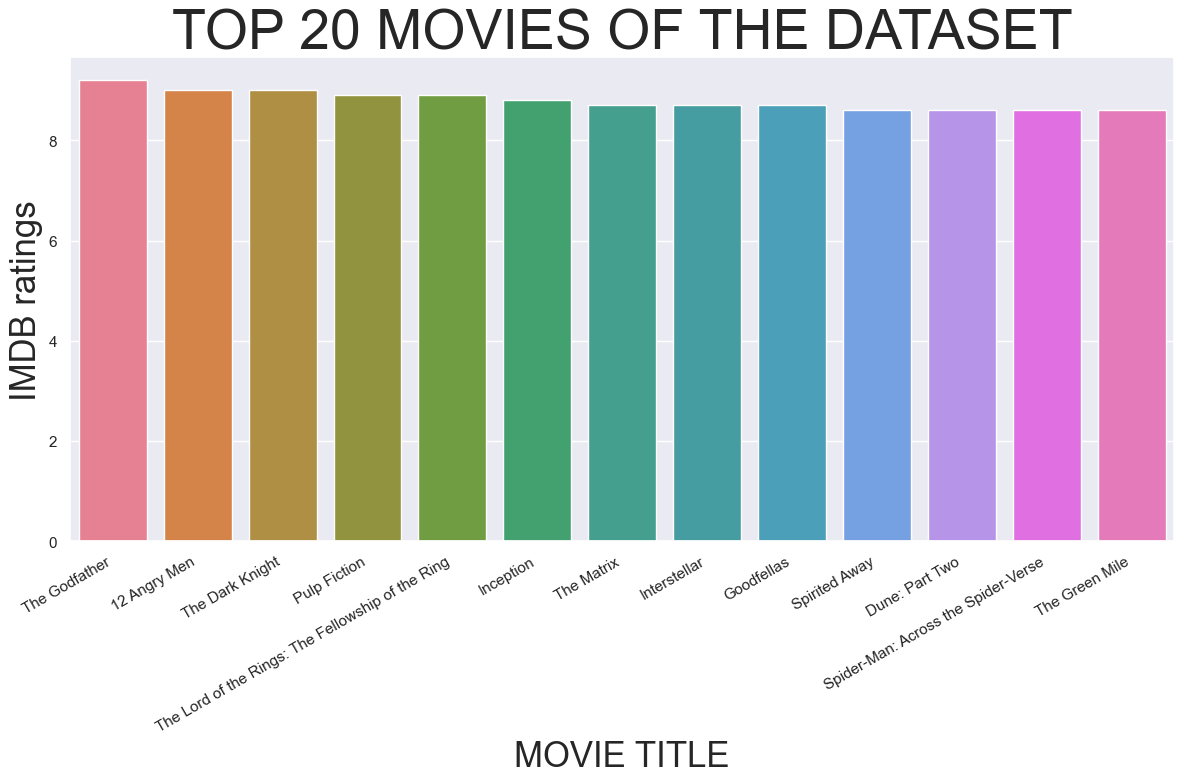

These are the top 10 directors with most movies:

director
George Miller        14
Tim Burton            8
Matt Reeves           7
Denis Villeneuve      7
Pete Docter           6
Hayao Miyazaki        6
Martin Scorsese       6
Ti West               6
Chris Buck            5
Andrew Adamson        5
Christopher Nolan     5
Jared Hess            5
John Krasinski        5
Mike Mitchell         4
Adam Wingard          4
Name: count, dtype: int64


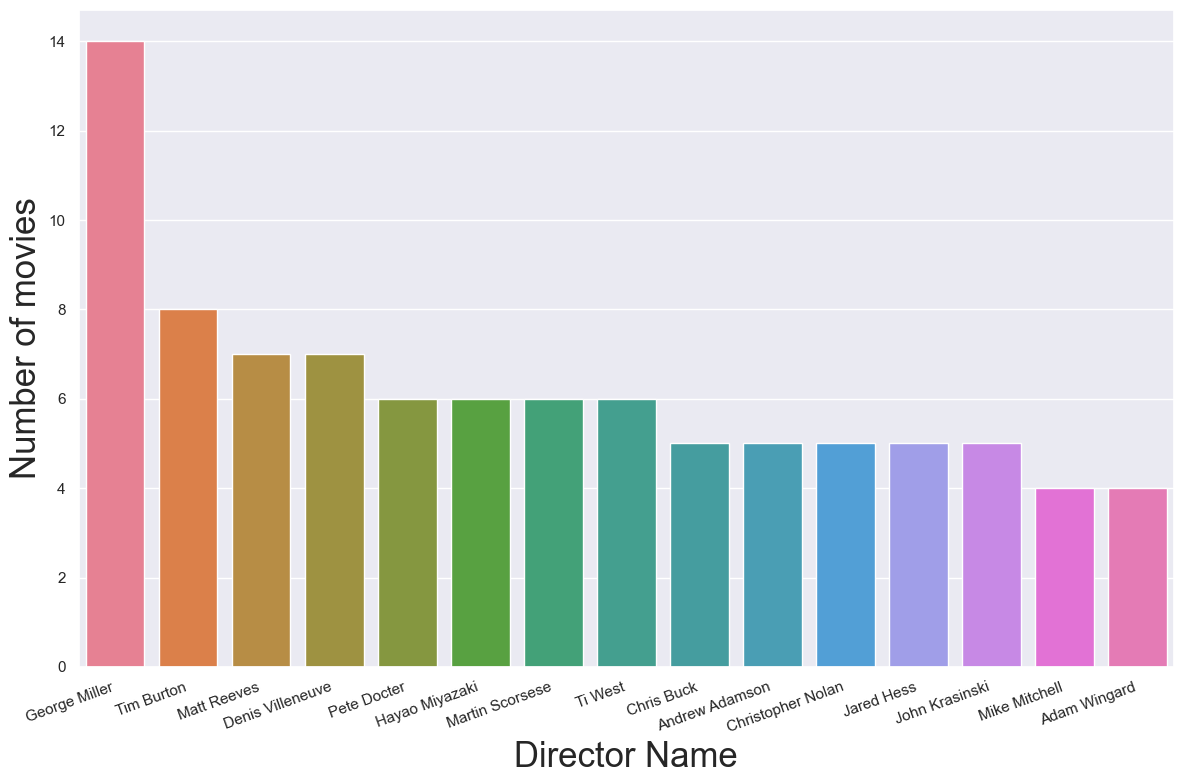

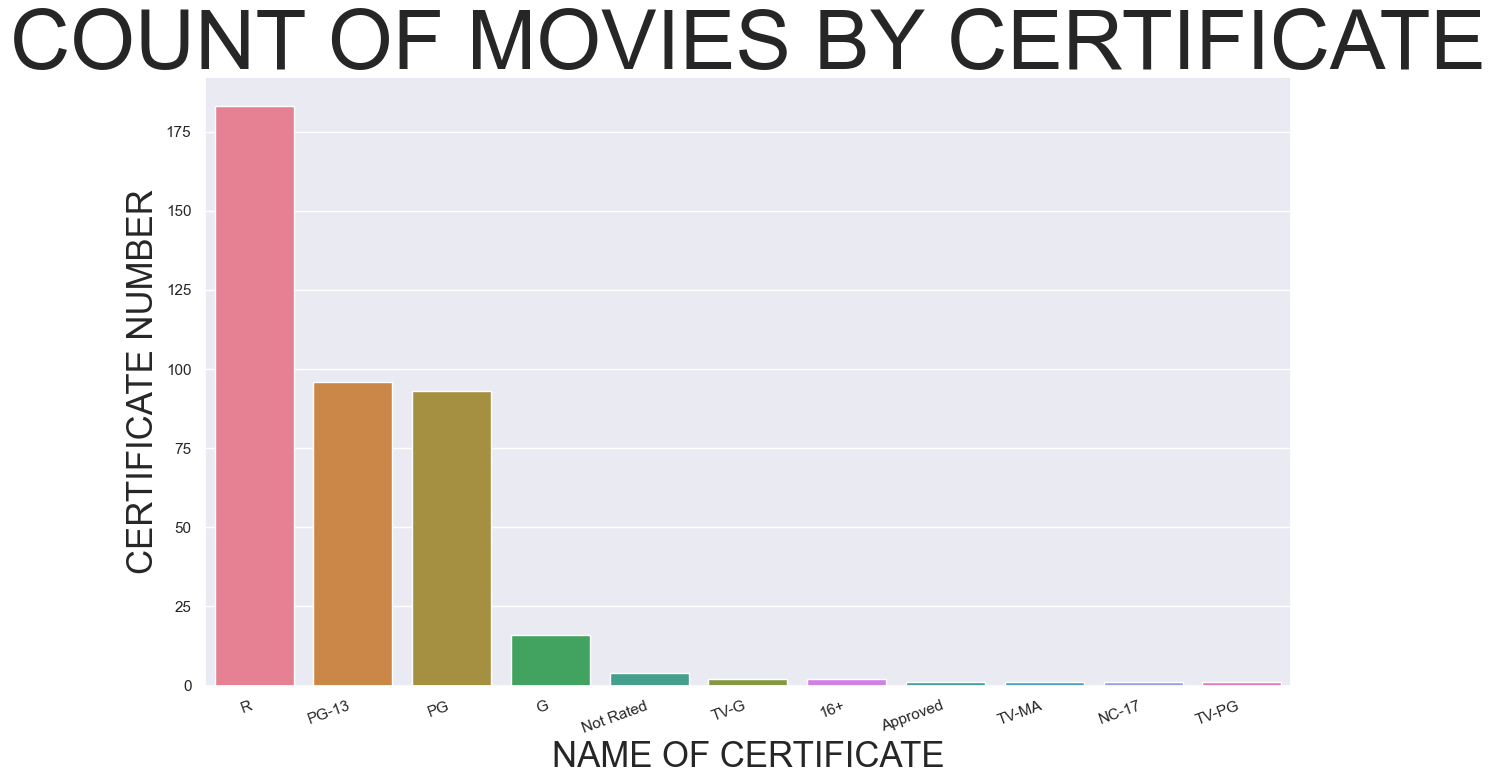

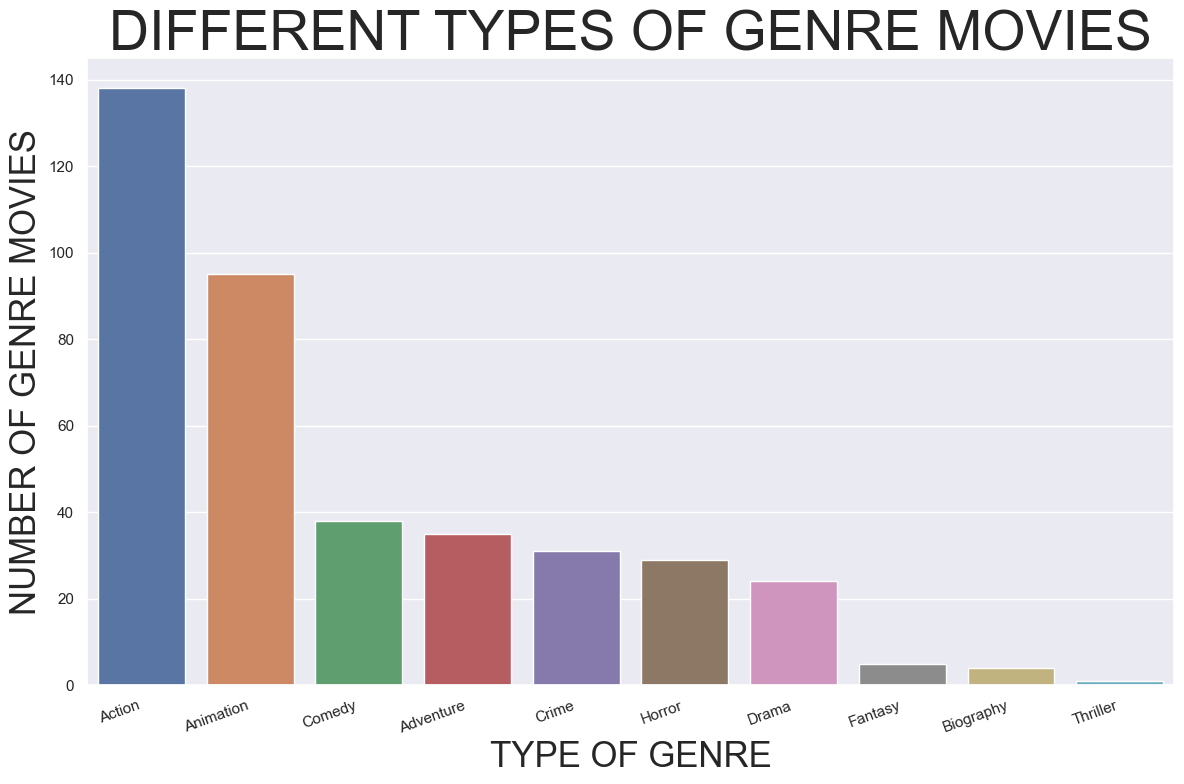

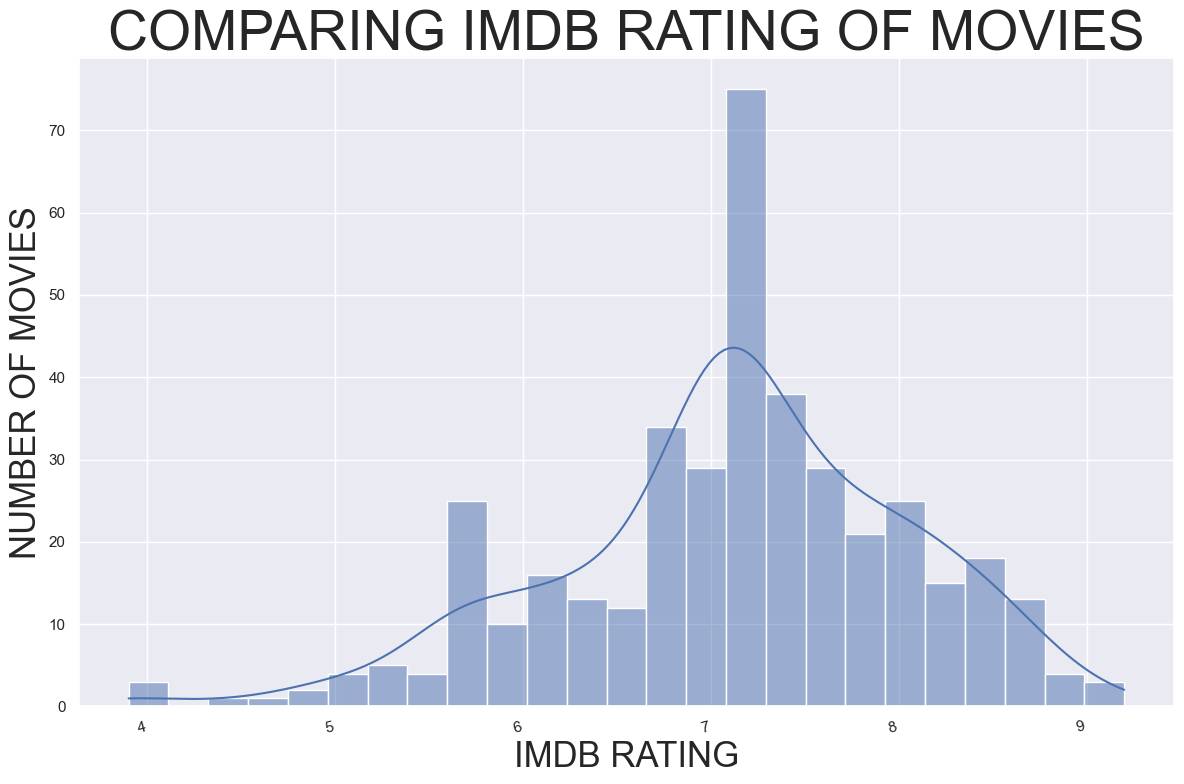

                                             title  imdb_rating  year  \
0                                        Gladiator          8.5  2000   
1    Mission: Impossible - Dead Reckoning Part One          7.7  2023   
2             Rebel Moon - Part Two: The Scargiver          5.2  2024   
3                             Inglourious Basterds          8.4  2009   
4                                      Borderlands          7.1  2024   
..                                             ...          ...   ...   
395                            Mother of the Bride          4.8  2024   
396                        Beetlejuice Beetlejuice          7.1  2024   
397                                The Idea of You          6.4  2024   
398                                             IF          6.7  2024   
399                                   The Fall Guy          7.1  2024   

    certificates          genre               director  \
0              R     ['Action']           Ridley Scott   
1      

In [3]:
#       -------------------------------------------------------------
#                   ANALYSIS OF IMDb_Dataset.csv  
#       -------------------------------------------------------------


#................step-1................
import os              #Useful working directory
import pandas as pd    # used to clean, read, manipulate data
import seaborn as sns  # used for advanced data manipulation
import matplotlib.pyplot as plt   # pyplot is a sub-library used to create graphs, bars

sns.set(style="darkgrid")        # used style as darkgrid
plt.rcParams["figure.figsize"] = (12, 8)    # used rcParams for setting fig size

#................step-2................]
file_path = os.path.join('data','IMDb_Dataset.csv')
df = pd.read_csv(file_path)    # creating df dataframe to read csv 
print("Data set imported successfully")       
df.head(10)

#................step-3................
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # cleaning column names
print("Columns cleaned successfully!!")
print(df.columns)

#................step-4................
#
''' Cleaning missing values '''
''' 
print(df.isnull().sum())

           OUTPUT
title             1
imdb_rating       1
duration_(hour)   1
dtype: int64     

Then we need to use dropna and fillna:

df = df.dropna(subset='imdb_rating')
df.fillna({'title': 'Unknown', 'duration_(hour)': 0}, inplace=True)

print(df)
'''

#................step-5................
top_movies = df.sort_values(by='imdb_rating', ascending=False).head(15)  # sorting top movies
print("Top 10 movies of IMDb rated:\n")   
print(top_movies[['title', 'imdb_rating', 'year']])

#................step-6................
plt.figure()
sns.barplot(x='title', y='imdb_rating', hue='title', data=top_movies, legend=False)
plt.title("TOP 20 MOVIES OF THE DATASET", fontsize=40)
plt.xlabel("MOVIE TITLE", fontsize=25)
plt.ylabel("IMDB ratings", fontsize=25)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

#................step-7................
top_directors = df['director'].value_counts().head(15)
print("These are the top 10 directors with most movies:\n")
print(top_directors)

plt.figure()
sns.barplot(y=top_directors.values, x=top_directors.index, hue=top_directors.index, legend=False)
plt.ylabel("Number of movies",fontsize=25)
plt.xlabel("Director Name",fontsize=25)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

#................step-8................
plt.figure()
sns.countplot(x='certificates', data=df, order=df['certificates'].value_counts().index, hue='certificates', legend=False)
plt.title("COUNT OF MOVIES BY CERTIFICATE", fontsize=60)
plt.xlabel("NAME OF CERTIFICATE",fontsize = 25)
plt.ylabel("CERTIFICATE NUMBER",fontsize=25)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

#................step-9................
df['genre'] = df['genre'].str.strip(',').str.strip()    # remove comma and unwanted spaces
df['genre'] = df['genre'].str.split(',')                # splitting genres into list
df_exploded = df.explode('genre')
df_exploded['genre'] = df_exploded['genre'].str.strip()

genre_counts = df_exploded['genre'].value_counts()

plt.figure()
sns.barplot(y=genre_counts.values, x=genre_counts.index, hue=genre_counts.index, legend=False)
plt.title("DIFFERENT TYPES OF GENRE MOVIES", fontsize=40)
plt.xlabel("TYPE OF GENRE", fontsize=25)
plt.ylabel("NUMBER OF GENRE MOVIES", fontsize=25)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

#................step-10................
# creating a histogram
plt.figure()
sns.histplot(df['imdb_rating'], kde=True, bins=25)    # kde = Kernel Density Estimate
plt.title("COMPARING IMDB RATING OF MOVIES", fontsize=40)
plt.xlabel("IMDB RATING", fontsize=25)
plt.ylabel("NUMBER OF MOVIES", fontsize=25)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

#................step-11................
df.to_csv("CLEANED_IMDb_Dataset.csv", index=False)

#................step-12................
clean_path = os.path.join('data','CLEANED_IMDb_Dataset.csv')
df = pd.read_csv(clean_path)
print(df)
print("<<<<<<<<<<<<<<<<<<<<<<SUCCESSFULLY COMPLETED ANALYSIS OF IMDb_Dataset.csv>>>>>>>>>>>>>>>>>>>>>")
